In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AL_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	174
float64		column 2	145
float64		column 3	145
float64		column 4	87
float64		column 5	203
float64		column 6	319
float64		column 7	294
float64		column 8	203
float64		column 9	609
float64		column 10	323
float64		column 11	555
float64		column 12	87
float64		column 13	145
float64		column 14	410
float64		column 15	667
float64		column 16	348
float64		column 17	526
float64		column 18	406
float64		column 19	145
float64		column 20	406
float64		column 21	584
float64		column 22	178
float64		column 23	555
float64		column 24	642
float64		column 25	497
float64		column 26	816
float64		column 27	29
float64		column 28	696
float64		column 29	700
float64		column 30	845
float64		column 31	700
float64		column 32	816
float64		column 33	58
float64		column 34	932
float64		column 35	845
float64		column 36	874
float64		column 37	377
float64		column 38	145
float64		column 39	468
float64		column 40	845
float64		column 41	265
float64		column 42	584
float64		

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4423.000000,4452.000000,4452.000000,4510.000000,4394.000000,4278.000000,4303.000000,4394.000000,3988.000000,4274.000000,...,4423.000000,4129.000000,3926.000000,4162.000000,4187.000000,3839.000000,3930.000000,3843.000000,4216.000000,3752.000000
mean,0.105322,0.214870,0.279951,0.062441,0.313107,0.095601,0.111085,0.106272,0.086808,0.240463,...,0.032254,0.036173,0.143147,0.016827,0.268044,0.077104,0.044721,4.612678,50.413188,284.691098
std,0.308544,1.308306,0.504633,1.380135,0.666654,0.275084,0.380762,0.406397,0.262786,0.652440,...,0.286079,0.217740,0.284483,0.112536,0.835937,0.258343,0.446909,25.263270,195.323109,623.629639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.611000,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.290000,15.000000,98.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.189750,0.000000,0.309000,0.050000,0.000000,3.706500,43.000000,271.250000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,3.330000,18.180000,...,10.000000,4.149000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

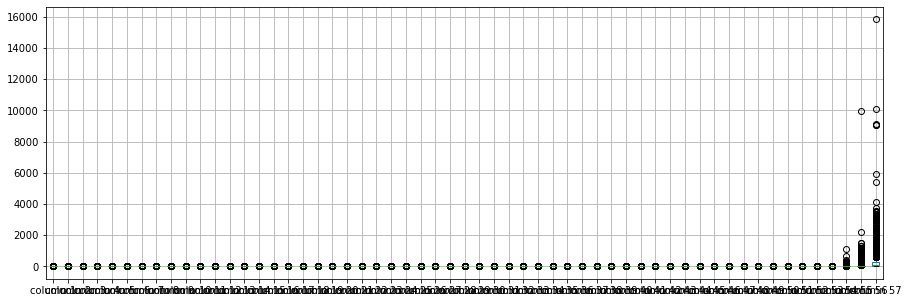

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.105322
column 2       0.214870
column 3       0.279951
column 4       0.062441
column 5       0.313107
column 6       0.095601
column 7       0.111085
column 8       0.106272
column 9       0.086808
column 10      0.240463
column 11      0.060834
column 12      0.543479
column 13      0.093652
column 14      0.058080
column 15      0.044756
column 16      0.249583
column 17      0.142405
column 18      0.184180
column 19      1.661404
column 20      0.083204
column 21      0.797481
column 22      0.120790
column 23      0.102113
column 24      0.096979
column 25      0.566849
column 26      0.285200
column 27      0.772373
column 28      0.132530
column 29      0.105938
column 30      0.113747
column 31      0.069951
column 32      0.054319
column 33      0.093783
column 34      0.056349
column 35      0.114619
column 36      0.105184
column 37      0.138047
column 38      0.011588
column 39      0.078077
column 40      0.068747
column 41      0.043996
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.018018,0.057565,0.014272,0.022040,0.061189,0.007557,-0.007676,0.114307,0.038923,...,-0.017640,-0.025757,-0.023615,-0.030994,0.052141,0.104597,-0.009752,0.032516,0.041697,0.061242
column 2,-0.018018,1.000000,-0.032238,-0.006691,-0.022435,-0.022149,0.004772,-0.016102,-0.007136,0.021333,...,-0.015801,-0.007335,-0.048797,-0.017943,-0.015911,-0.009601,0.003117,0.005999,-0.000112,-0.022890
column 3,0.057565,-0.032238,1.000000,-0.019477,0.078041,0.087941,0.038647,0.008463,0.097817,0.029035,...,-0.026026,-0.031348,-0.019857,-0.034957,0.102225,0.083459,0.000018,0.081326,0.093223,0.055534
column 4,0.014272,-0.006691,-0.019477,1.000000,0.004956,-0.010044,0.015197,0.011162,-0.001364,-0.001716,...,-0.001345,0.001891,-0.010108,-0.006537,-0.002221,0.007200,-0.002441,0.004087,0.018711,0.017837
column 5,0.022040,-0.022435,0.078041,0.004956,1.000000,0.054209,0.154672,0.026321,0.019759,0.027697,...,-0.033169,-0.033108,-0.053541,-0.023482,0.022258,0.029937,0.006408,0.035124,0.046199,-0.001617
column 6,0.061189,-0.022149,0.087941,-0.010044,0.054209,1.000000,0.071944,0.081912,0.133693,0.018550,...,-0.033024,-0.024356,-0.023206,-0.012364,0.063535,0.119077,0.025081,-0.006211,0.084691,0.080622
column 7,0.007557,0.004772,0.038647,0.015197,0.154672,0.071944,1.000000,0.056553,0.058746,0.057018,...,-0.032072,-0.032636,-0.050223,-0.025343,0.047868,0.065030,0.054953,0.054322,0.058337,-0.012554
column 8,-0.007676,-0.016102,0.008463,0.011162,0.026321,0.081912,0.056553,1.000000,0.133274,0.092939,...,-0.022103,-0.028350,-0.035957,-0.019719,0.034309,0.062444,-0.007063,0.015103,0.038421,0.044640
column 9,0.114307,-0.007136,0.097817,-0.001364,0.019759,0.133693,0.058746,0.133274,1.000000,0.150884,...,-0.026394,-0.010669,-0.032862,0.018286,0.040824,0.137559,-0.000165,0.102680,0.167339,0.247799
column 10,0.038923,0.021333,0.029035,-0.001716,0.027697,0.018550,0.057018,0.092939,0.150884,1.000000,...,-0.014013,0.018993,0.006658,0.003884,0.027551,0.089525,0.043089,0.068751,0.087111,0.084396


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+20,17+20+20,17+20+20+20,17+20+20,17+20,17], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 557.0123231734964
Epoch: 1 , loss: 554.6441591907461
Epoch: 2 , loss: 557.930614989809
Epoch: 3 , loss: 551.1166358442672
Epoch: 4 , loss: 547.7526162709094
Epoch: 5 , loss: 552.1888703136909
Epoch: 6 , loss: 558.4265128743773
Epoch: 7 , loss: 553.3478622170691
Epoch: 8 , loss: 547.1496714415866
Epoch: 9 , loss: 552.7860603199604
Epoch: 10 , loss: 543.3018351697756
Epoch: 11 , loss: 532.3763517054116
Epoch: 12 , loss: 479.5569708953751
Epoch: 13 , loss: 440.016627188759
Epoch: 14 , loss: 438.51247748929865
Epoch: 15 , loss: 433.7682877916077
Epoch: 16 , loss: 419.1657079503927
Epoch: 17 , loss: 406.4156459449476
Epoch: 18 , loss: 418.33204342513136
Epoch: 19 , loss: 427.8557494691855
Epoch: 20 , loss: 423.1824379366034
Epoch: 21 , loss: 403.28171167141056
Epoch: 22 , loss: 424.4041910736403
Epoch: 23 , loss: 423.6149306081313
Epoch: 24 , loss: 437.1108747475654
Epoch: 25 , loss: 410.6111683862135
Epoch

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.031362,0.0,-0.118265,-0.135093,-0.041531,-1.869177,-95.555348,-1021.30534
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

16678.210720421943

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3514261240649834

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.0,0.778000,0.000000,0.000000,3.756000,61.000000,278.00000
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.163362,0.0,0.253735,0.044907,0.006469,3.244823,5.444652,6.69466
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135000,0.0,0.135000,0.000000,0.000000,3.537000,40.000000,191.00000
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223000,0.0,0.000000,0.000000,0.000000,3.000000,15.000000,54.00000
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054000,0.0,0.164000,0.054000,0.000000,1.671000,4.000000,112.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348000,0.0,1.160000,0.000000,0.000000,3.121000,15.000000,103.00000
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.043000,15.000000,70.00000
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136000,0.0,0.000000,0.000000,0.409000,1.837000,12.000000,68.00000
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032000,0.0,0.065000,0.000000,0.000000,1.189000,5.000000,69.00000


In [21]:
imputations[-1].to_excel("Spam_AE_10(imp).xlsx", index=False, header=False)